## **Import Libraries**

In [86]:
%pip install ydata_profiling

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np

In [88]:
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [89]:
airlines = pd.read_csv("airlines.csv")

In [90]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [91]:
airlines.columns

Index(['IATA_CODE', 'AIRLINE'], dtype='object')

In [92]:
airlines.shape

(14, 2)

In [93]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


In [94]:
airports = pd.read_csv("airports.csv")

In [95]:
airports.head(30)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [96]:
airports.columns

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [97]:
airports.shape

(322, 7)

In [98]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [99]:
flights = pd.read_csv("flights.csv")

In [100]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [102]:
flights.shape

(5819079, 31)

In [103]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

## Merge Airlines and flights data

In [104]:
airlines = airlines.rename(columns={'AIRLINE': 'AL_FULLNAME', 'IATA_CODE': 'AIRLINE'})

In [20]:
#convert column names to lowercase
flights.columns = flights.columns.str.lower()
airlines.columns = airlines.columns.str.lower()
airports.columns = airports.columns.str.lower()

In [21]:
flights.columns

Index(['year', 'month', 'day', 'day_of_week', 'airline', 'flight_number',
       'tail_number', 'origin_airport', 'destination_airport',
       'scheduled_departure', 'departure_time', 'departure_delay', 'taxi_out',
       'wheels_off', 'scheduled_time', 'elapsed_time', 'air_time', 'distance',
       'wheels_on', 'taxi_in', 'scheduled_arrival', 'arrival_time',
       'arrival_delay', 'diverted', 'cancelled', 'cancellation_reason',
       'air_system_delay', 'security_delay', 'airline_delay',
       'late_aircraft_delay', 'weather_delay'],
      dtype='object')

In [22]:
airlines.columns

Index(['airline', 'al_fullname'], dtype='object')

In [23]:
# merge airlines and flights data to get full names of airlines
flights_merged = flights.merge(airlines, how = 'left', on = 'airline')

In [24]:
flights_merged.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,al_fullname
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.


In [25]:
flights_merged.columns

Index(['year', 'month', 'day', 'day_of_week', 'airline', 'flight_number',
       'tail_number', 'origin_airport', 'destination_airport',
       'scheduled_departure', 'departure_time', 'departure_delay', 'taxi_out',
       'wheels_off', 'scheduled_time', 'elapsed_time', 'air_time', 'distance',
       'wheels_on', 'taxi_in', 'scheduled_arrival', 'arrival_time',
       'arrival_delay', 'diverted', 'cancelled', 'cancellation_reason',
       'air_system_delay', 'security_delay', 'airline_delay',
       'late_aircraft_delay', 'weather_delay', 'al_fullname'],
      dtype='object')

## Merge flights_merged and Airport Data

In [26]:
#merge origin airport data onto main df
merged_df = pd.merge(flights_merged, airports, left_on='origin_airport', right_on='iata_code', how='left')
merged_df.rename(columns={'airport': 'origin_airport_name', 'city': 'origin_city', 'state': 'origin_state', 'country': 'origin_country', 'latitude': 'origin_latitude', 'longitude': 'origin_longitude'}, inplace=True)
merged_df.drop('iata_code', axis=1, inplace=True)

In [27]:
merged_df.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,airline_delay,late_aircraft_delay,weather_delay,al_fullname,origin_airport_name,origin_city,origin_state,origin_country,origin_latitude,origin_longitude
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,NaN,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,NaN,NaN,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,NaN,NaN,US Airways Inc.,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,NaN,NaN,NaN,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,NaN,NaN,NaN,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


In [28]:
merged_df.columns

Index(['year', 'month', 'day', 'day_of_week', 'airline', 'flight_number',
       'tail_number', 'origin_airport', 'destination_airport',
       'scheduled_departure', 'departure_time', 'departure_delay', 'taxi_out',
       'wheels_off', 'scheduled_time', 'elapsed_time', 'air_time', 'distance',
       'wheels_on', 'taxi_in', 'scheduled_arrival', 'arrival_time',
       'arrival_delay', 'diverted', 'cancelled', 'cancellation_reason',
       'air_system_delay', 'security_delay', 'airline_delay',
       'late_aircraft_delay', 'weather_delay', 'al_fullname',
       'origin_airport_name', 'origin_city', 'origin_state', 'origin_country',
       'origin_latitude', 'origin_longitude'],
      dtype='object')

In [29]:
# merge destination airport data onto main df
merged_df = pd.merge(merged_df, airports, left_on='destination_airport', right_on='iata_code', how='left')
merged_df.rename(columns={'airport': 'destination_airport_name', 'city': 'destination_city', 'state': 'destination_state', 'country': 'destination_country', 'latitude': 'destination_latitude', 'longitude': 'destination_longitude'}, inplace=True)


In [30]:
merged_df.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,origin_country,origin_latitude,origin_longitude,iata_code,destination_airport_name,destination_city,destination_state,destination_country,destination_latitude,destination_longitude
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [31]:
merged_df.drop('iata_code', axis=1, inplace=True)

df = merged_df

In [32]:
df.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,origin_state,origin_country,origin_latitude,origin_longitude,destination_airport_name,destination_city,destination_state,destination_country,destination_latitude,destination_longitude
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,CA,USA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,CA,USA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,CA,USA,33.94254,-118.40807,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,WA,USA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


## Analysing Data Inconsistencies

In [33]:
#get info on columns types and number of null and unique values

df_dtypes = pd.DataFrame(df.dtypes, columns = ['dtypes'])
null_count = df.isnull().sum().rename('null values')
null_pct = (df.isnull().sum() / df.shape[0] * 100).rename('null percent')
df_unique = df.nunique(axis=0).rename('unique vals')

result = pd.concat([df_dtypes, null_count, null_pct, df_unique], axis=1).T
result

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,origin_state,origin_country,origin_latitude,origin_longitude,destination_airport_name,destination_city,destination_state,destination_country,destination_latitude,destination_longitude
dtypes,int64,int64,int64,int64,object,int64,object,object,object,int64,...,object,object,float64,float64,object,object,object,object,float64,float64
null values,0,0,0,0,0,0,14721,0,0,0,...,486165,486165,490770,490770,486165,486165,486165,486165,490775,490775
null percent,0.0,0.0,0.0,0.0,0.0,0.0,0.252978,0.0,0.0,0.0,...,8.354673,8.354673,8.433809,8.433809,8.354673,8.354673,8.354673,8.354673,8.433895,8.433895
unique vals,1,12,31,7,14,6952,4897,930,930,1321,...,54,1,319,319,322,308,54,1,319,319


In [ ]:
#drop columns with little variability/not useful in prediciton/visualization or redundant
df = df.drop(columns = ['flight_number', 'tail_number', 'taxi_out',
                   'wheels_off', 'air_time', 'taxi_in', 'diverted',
                  'cancellation_reason', 'air_system_delay', 'security_delay',
                   'airline_delay', 'late_aircraft_delay', 'weather_delay', 'origin_country', 'destination_country'])

In [35]:
df.head()

,year,month,day,day_of_week,airline,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,...,origin_airport_name,origin_city,origin_state,origin_latitude,origin_longitude,destination_airport_name,destination_city,destination_state,destination_latitude,destination_longitude
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,...,Los Angeles International Airport,Los Angeles,CA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,26.68316,-80.09559
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,...,San Francisco International Airport,San Francisco,CA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,35.21401,-80.94313
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,...,Los Angeles International Airport,Los Angeles,CA,33.94254,-118.40807,Miami International Airport,Miami,FL,25.79325,-80.29056
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,...,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619


In [36]:
#create "date", "week_number", "sched_hour", and "dow_name" columns
df['date'] = pd.to_datetime(df[['year','month', 'day']])
df['week_number'] = df['date'].dt.strftime('%U')
df['dow_name'] = df['date'].dt.strftime('%A')


#function that assigns season based on month. May be useful for visualization
def season_cat(x):
    if x in [12,1,2]:
        return 'winter'
    elif x in [3,4,5]:
        return 'spring'
    elif x in [6,7,8]:
        return 'summer'
    return 'autumn'

#create season type column and count # of short/med/long flights
df['season'] = df['month'].apply(season_cat)

df = df.drop(columns = 'year')

In [37]:
#check if there are airports in flights that are not in airports.'set' creates unique list of things
unmatched_origin_airports = set(df['origin_airport']) - set(airports['iata_code'])
unmatched_destination_airports = set(df['destination_airport']) - set(airports['iata_code'])
len(unmatched_origin_airports)

608

In [38]:
#remove observations where airport is an integer
import re
import pandas as pd

# Check if 'origin_airport' or 'destination_airport' can be converted to numeric values
is_numeric = pd.to_numeric(df['origin_airport'], errors='coerce').notna() | pd.to_numeric(df['destination_airport'], errors='coerce').notna()

# Drop the rows where either 'origin_airport' or 'destination_airport' contains integer values
df = df[~is_numeric]

In [39]:
df.head(10)

,month,day,day_of_week,airline,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_time,...,origin_longitude,destination_airport_name,destination_city,destination_state,destination_latitude,destination_longitude,date,week_number,dow_name,season
0,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,205.0,...,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,2015-01-01,00,Thursday,winter
1,1,1,4,AA,LAX,PBI,10,2.0,-8.0,280.0,...,-118.40807,Palm Beach International Airport,West Palm Beach,FL,26.68316,-80.09559,2015-01-01,00,Thursday,winter
2,1,1,4,US,SFO,CLT,20,18.0,-2.0,286.0,...,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,35.21401,-80.94313,2015-01-01,00,Thursday,winter
3,1,1,4,AA,LAX,MIA,20,15.0,-5.0,285.0,...,-118.40807,Miami International Airport,Miami,FL,25.79325,-80.29056,2015-01-01,00,Thursday,winter
4,1,1,4,AS,SEA,ANC,25,24.0,-1.0,235.0,...,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,2015-01-01,00,Thursday,winter
5,1,1,4,DL,SFO,MSP,25,20.0,-5.0,217.0,...,-122.37484,Minneapolis-Saint Paul International Airport,Minneapolis,MN,44.88055,-93.21692,2015-01-01,00,Thursday,winter
6,1,1,4,NK,LAS,MSP,25,19.0,-6.0,181.0,...,-115.15233,Minneapolis-Saint Paul International Airport,Minneapolis,MN,44.88055,-93.21692,2015-01-01,00,Thursday,winter
7,1,1,4,US,LAX,CLT,30,44.0,14.0,273.0,...,-118.40807,Charlotte Douglas International Airport,Charlotte,NC,35.21401,-80.94313,2015-01-01,00,Thursday,winter
8,1,1,4,AA,SFO,DFW,30,19.0,-11.0,195.0,...,-122.37484,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,32.89595,-97.03720,2015-01-01,00,Thursday,winter
9,1,1,4,DL,LAS,ATL,30,33.0,3.0,221.0,...,-115.15233,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64044,-84.42694,2015-01-01,00,Thursday,winter


Below we write a script to transform the arrival and departure times from continuous floats to time objects e.g. 1730 --> 17:30

In [40]:
from datetime import datetime

# write a function to convert float time to string time format
def convert_float_time(float_time):
    time_string = str(float_time).split('.')[0].zfill(4) # ensure 4 characters

    try:
        hour = int(time_string[:-2]) #first two will be the hour
        minute = int(time_string[-2:]) #last will be minutes

        if hour >= 24:
            hour = hour % 24

        return f"{hour:02d}:{minute:02d}:00"
    except ValueError: #return none where there are null values
        return None

# Apply the conversion function to the arrival_time column
df['arrival_time'] = df['arrival_time'].apply(convert_float_time)
df['departure_time'] = df['departure_time'].apply(convert_float_time)
df['scheduled_departure'] = df['scheduled_departure'].apply(convert_float_time)

# Combine date and scheduled departure columns into a single datetime column
df['scheduled_departure_datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['scheduled_departure'])

#get hour from the scheduled departure time
df['sched_hour'] = df['scheduled_departure_datetime'].dt.strftime('%H')

In [41]:
df.head(10)

,month,day,day_of_week,airline,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_time,...,destination_city,destination_state,destination_latitude,destination_longitude,date,week_number,dow_name,season,scheduled_departure_datetime,sched_hour
0,1,1,4,AS,ANC,SEA,00:05:00,23:54:00,-11.0,205.0,...,Seattle,WA,47.44898,-122.30931,2015-01-01,00,Thursday,winter,2015-01-01 00:05:00,00
1,1,1,4,AA,LAX,PBI,00:10:00,00:02:00,-8.0,280.0,...,West Palm Beach,FL,26.68316,-80.09559,2015-01-01,00,Thursday,winter,2015-01-01 00:10:00,00
2,1,1,4,US,SFO,CLT,00:20:00,00:18:00,-2.0,286.0,...,Charlotte,NC,35.21401,-80.94313,2015-01-01,00,Thursday,winter,2015-01-01 00:20:00,00
3,1,1,4,AA,LAX,MIA,00:20:00,00:15:00,-5.0,285.0,...,Miami,FL,25.79325,-80.29056,2015-01-01,00,Thursday,winter,2015-01-01 00:20:00,00
4,1,1,4,AS,SEA,ANC,00:25:00,00:24:00,-1.0,235.0,...,Anchorage,AK,61.17432,-149.99619,2015-01-01,00,Thursday,winter,2015-01-01 00:25:00,00
5,1,1,4,DL,SFO,MSP,00:25:00,00:20:00,-5.0,217.0,...,Minneapolis,MN,44.88055,-93.21692,2015-01-01,00,Thursday,winter,2015-01-01 00:25:00,00
6,1,1,4,NK,LAS,MSP,00:25:00,00:19:00,-6.0,181.0,...,Minneapolis,MN,44.88055,-93.21692,2015-01-01,00,Thursday,winter,2015-01-01 00:25:00,00
7,1,1,4,US,LAX,CLT,00:30:00,00:44:00,14.0,273.0,...,Charlotte,NC,35.21401,-80.94313,2015-01-01,00,Thursday,winter,2015-01-01 00:30:00,00
8,1,1,4,AA,SFO,DFW,00:30:00,00:19:00,-11.0,195.0,...,Dallas-Fort Worth,TX,32.89595,-97.03720,2015-01-01,00,Thursday,winter,2015-01-01 00:30:00,00
9,1,1,4,DL,LAS,ATL,00:30:00,00:33:00,3.0,221.0,...,Atlanta,GA,33.64044,-84.42694,2015-01-01,00,Thursday,winter,2015-01-01 00:30:00,00


## Visual Data Analysis

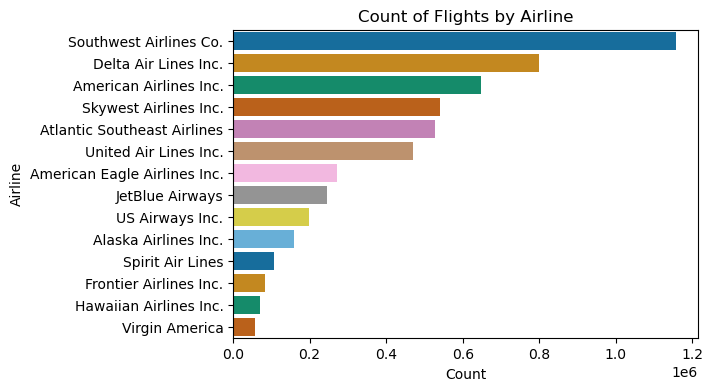

In [42]:
#get the count of all unqiue airlines
airline_counts = df['al_fullname'].value_counts().sort_values(ascending=False)

# Create a bar chart using seaborn
plt.figure(figsize=(6, 4))
sns.color_palette("colorblind")
plt.title("Count of Flights by Airline")
sns.barplot(x=airline_counts.values, y=airline_counts.index,palette="colorblind")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

Spothwest Airlines Co. seems like the most popular choice based on number of flights followed by Delta Airlines Inc. Virgin America seems to have the least number of flights taken in 2015.

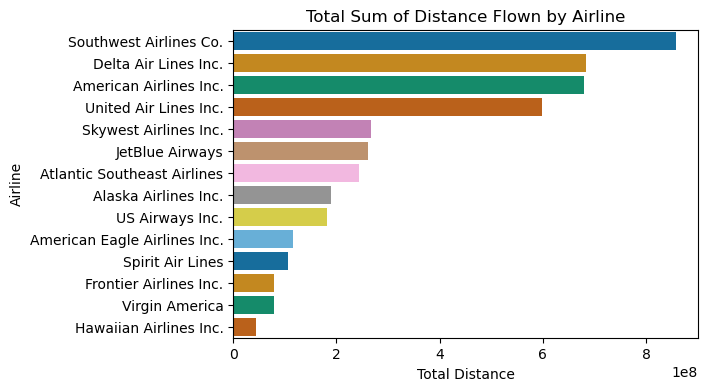

In [43]:
#calculate total distance, and plot
airline_sum_distance = df.groupby('al_fullname')['distance'].sum().sort_values(ascending=False)
# Create a bar plot using seaborn
plt.figure(figsize=(6,4))
sns.barplot(x=airline_sum_distance.values, y=airline_sum_distance.index, palette="colorblind")
plt.title("Total Sum of Distance Flown by Airline")
plt.xlabel("Total Distance")
plt.ylabel("Airline")
plt.show()

According to the length of distance travelled, Spothwest Airlines Co., Delta Air lines Inc. and  United Air lines Inc. have flown over the longest distances in 2015. Hawaiian Airlines Inc. have covered the least distance in the same year.

<Axes: ylabel='Frequency'>

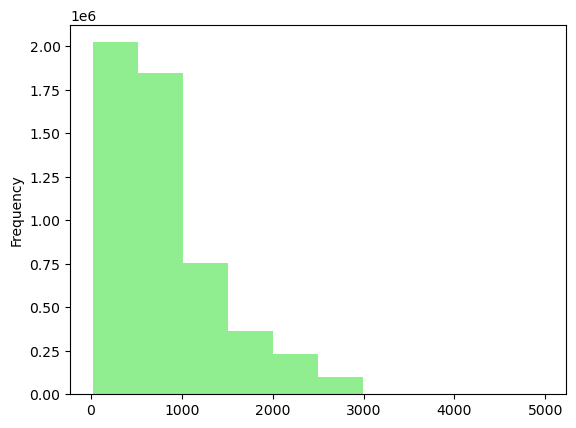

In [44]:
df['distance'].plot(kind = 'hist', color='lightgreen')

According to the above histogram, the max flights taken had covered a distanve less than 1000 miles. Let's create a categorical variable to understand each airline's relationship with distance.

In [45]:
# function that assigns 'short' 'medium' or 'long' based on distance

def dist_cat(x):
    if x < 1000:
        return 'short'
    elif 1000 <= x <= 2000:
        return 'medium'
    return 'long'

# create dist type column and count # of short/med/long flights

df['dist_type'] = df['distance'].apply(dist_cat)
df['dist_type'].value_counts()

dist_type
short     3820411
medium    1169852
long       342651
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='al_fullname'>

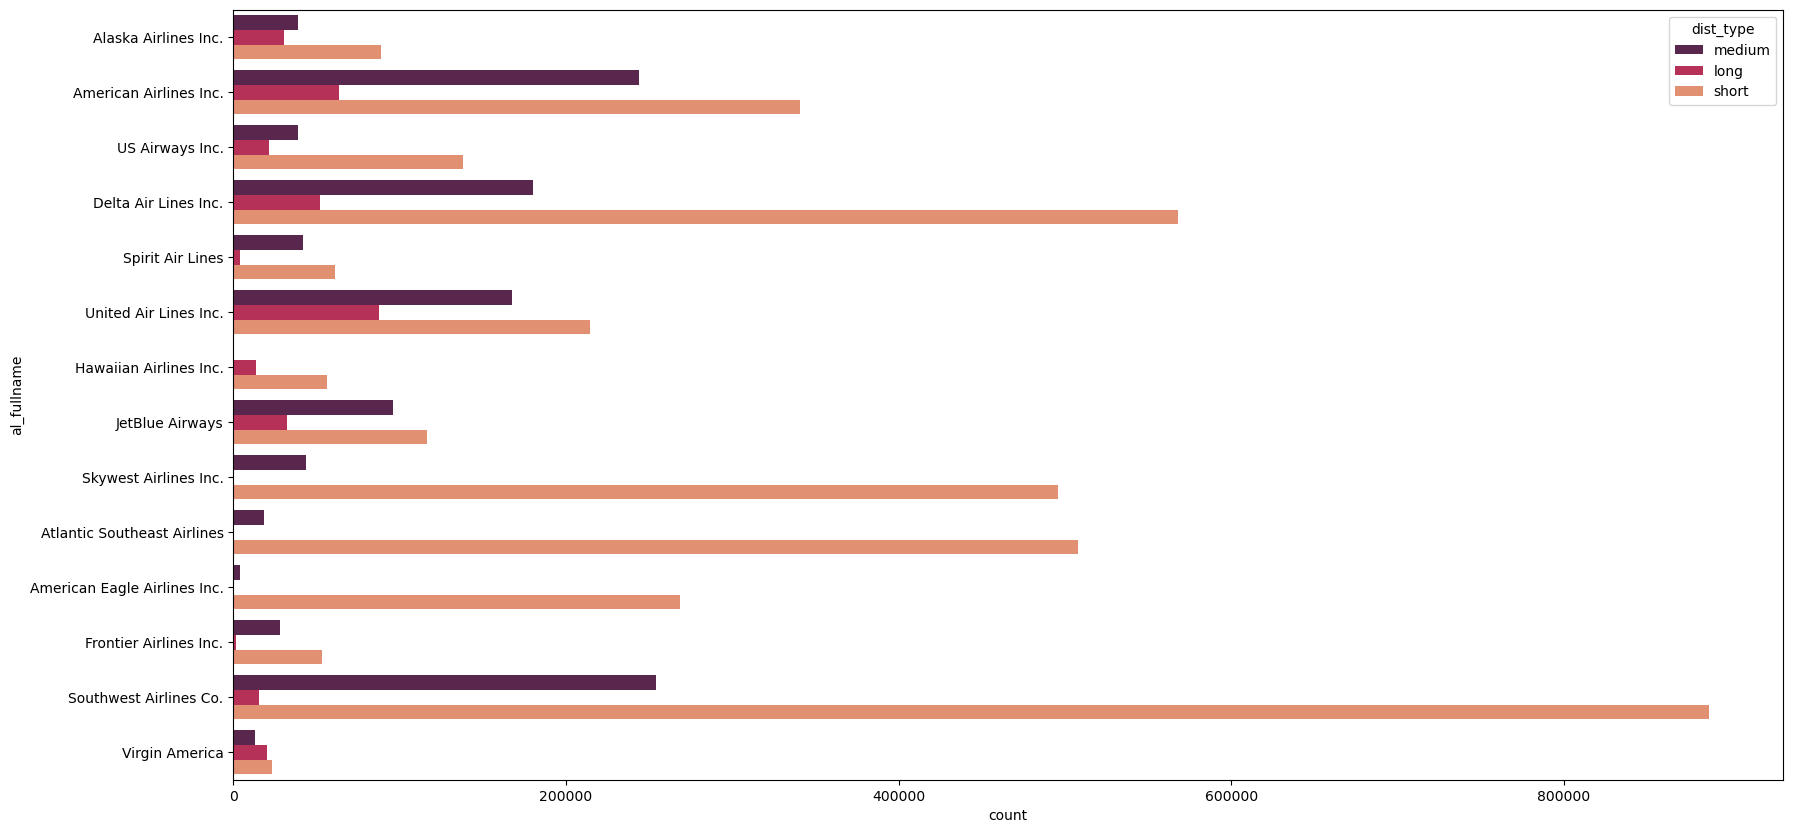

In [46]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, y ='al_fullname',hue='dist_type',palette="rocket")

 ### In terms of delays, how does each airline perform?

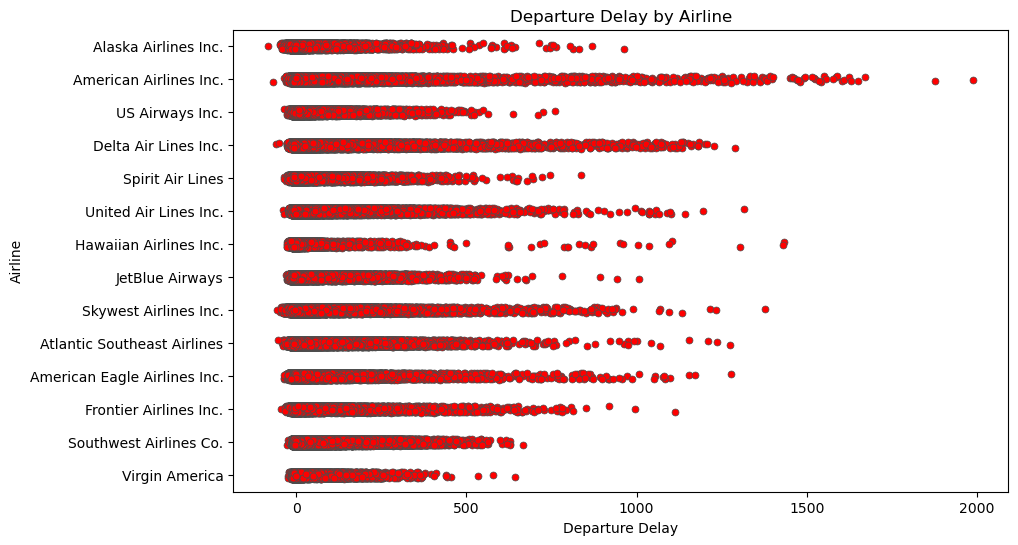

In [47]:
plt.figure(figsize=(10, 6))
sns.stripplot(y="al_fullname", x="departure_delay", data=df, linewidth = 0.5,  jitter=True, color='red')
plt.title("Departure Delay by Airline")
plt.xlabel("Departure Delay")
plt.ylabel("Airline")
plt.show()

Text(0.5, 0, 'Average Delay [@Departure: blue, @Arrival: hatch lines]')

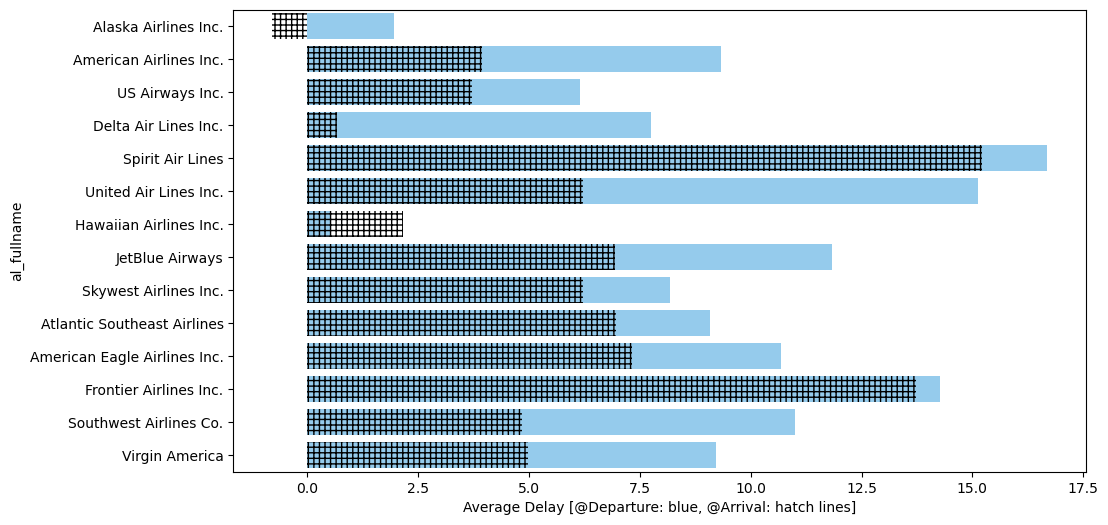

In [48]:
fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="departure_delay", y="al_fullname", data=df, color="lightskyblue", ci=None)
ax = sns.barplot(x="arrival_delay", y="al_fullname", data=df, hatch = '+++', alpha = 0.0, ci=None)
plt.xlabel('Average Delay [@Departure: blue, @Arrival: hatch lines]')

In [49]:
df.groupby(['al_fullname'])['departure_delay'].mean().sort_values(ascending = False).reset_index()

,al_fullname,departure_delay
0,Spirit Air Lines,16.683317
1,United Air Lines Inc.,15.131718
2,Frontier Airlines Inc.,14.267977
3,JetBlue Airways,11.828654
4,Southwest Airlines Co.,10.995318
5,American Eagle Airlines Inc.,10.685483
6,American Airlines Inc.,9.330882
7,Virgin America,9.211211
8,Atlantic Southeast Airlines,9.076964
9,Skywest Airlines Inc.,8.181225


In [50]:
df.groupby(['destination_city'])['arrival_delay'].mean().sort_values().nlargest(10)

destination_city
St Cloud                23.025974
Trenton                 17.433901
Agana                   17.320242
North Bend              16.740602
Marquette               16.152027
Aspen                   15.829448
Plattsburgh             15.288256
Beaumont/Port Arthur    14.631694
Aguadilla               12.192771
Atlantic City           11.825496
Name: arrival_delay, dtype: float64

Text(0, 0.5, 'Arrival Delay')

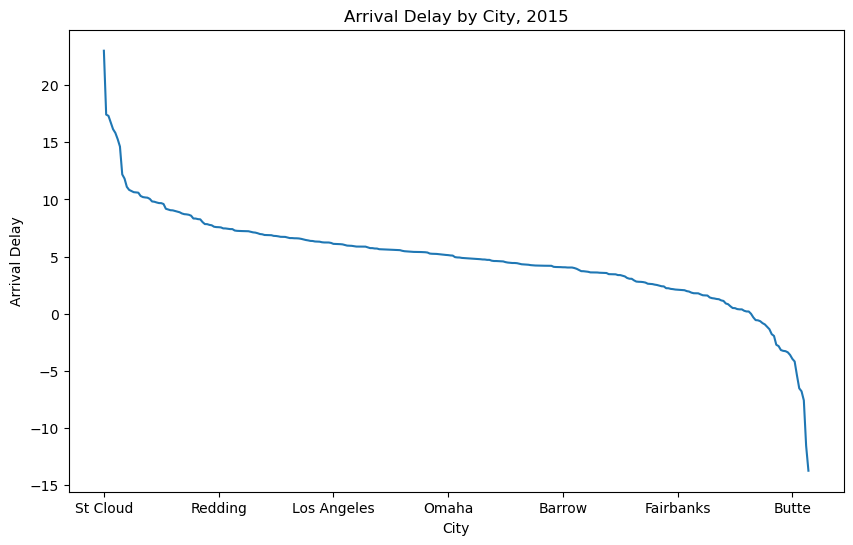

In [51]:
plt.figure(figsize=(10, 6))
df.groupby(['destination_city'])['arrival_delay'].mean().sort_values(ascending = False).plot()
plt.title('Arrival Delay by City, 2015')
plt.xlabel('City')
plt.ylabel('Arrival Delay')

In [52]:
df.groupby(['origin_city'])['departure_delay'].mean().sort_values().nlargest(10)

origin_city
Marthas Vineyard        25.907317
Hyannis                 23.182927
St Cloud                18.692308
North Bend              17.777358
Aspen                   17.587538
Crescent City           17.413793
Gustavus                17.171053
Beaumont/Port Arthur    17.020856
Agana                   16.647590
Nantucket               16.388889
Name: departure_delay, dtype: float64

Text(0, 0.5, 'Departure Delay')

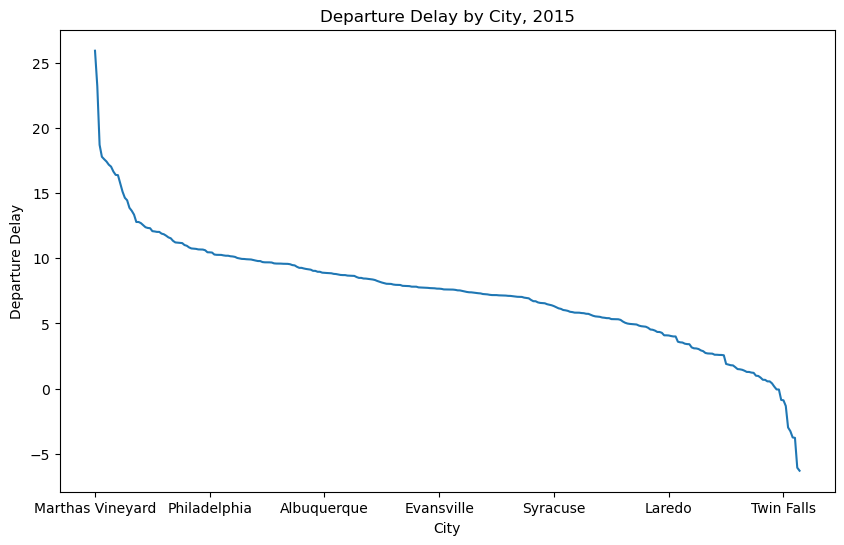

In [53]:
plt.figure(figsize=(10, 6))
df.groupby(['origin_city'])['departure_delay'].mean().sort_values(ascending = False).plot()
plt.title('Departure Delay by City, 2015')
plt.xlabel('City')
plt.ylabel('Departure Delay')

In [54]:
df.groupby(['destination_state'])['arrival_delay'].mean().sort_values().nlargest(10)

destination_state
DE    21.989474
GU    17.320242
VT     8.933242
NY     8.143117
WV     8.053402
NJ     7.875529
AR     7.863541
AS     7.401869
PR     7.234498
NH     7.170008
Name: arrival_delay, dtype: float64

Text(0, 0.5, 'Arrival Delay')

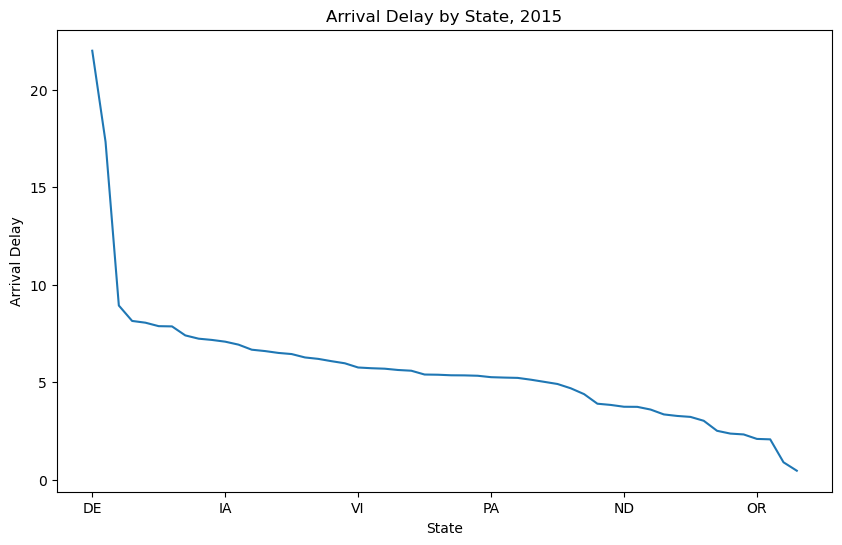

In [55]:
plt.figure(figsize=(10, 6))
df.groupby(['destination_state'])['arrival_delay'].mean().sort_values(ascending = False).plot()
plt.title('Arrival Delay by State, 2015')
plt.xlabel('State')
plt.ylabel('Arrival Delay')

In [56]:
df.groupby(['origin_state'])['departure_delay'].mean().sort_values().nlargest(10)

origin_state
DE    29.391753
GU    16.647590
AS    15.102804
IL    13.643565
NJ    13.535258
MD    13.341158
NY    11.703361
CO    11.630259
WV    11.518694
FL    10.961079
Name: departure_delay, dtype: float64

Text(0, 0.5, 'Departure Delay')

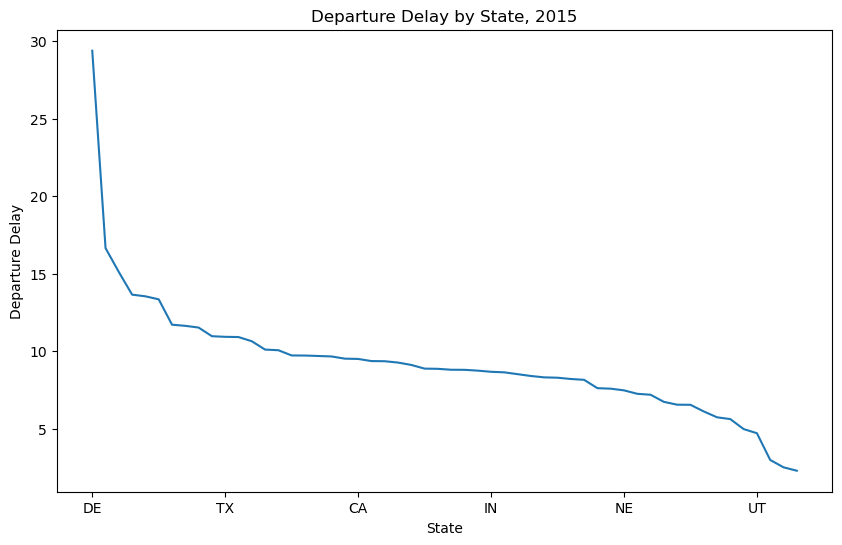

In [57]:
plt.figure(figsize=(10, 6))
df.groupby(['origin_state'])['departure_delay'].mean().sort_values(ascending = False).plot()
plt.title('Departure Delay by State, 2015')
plt.xlabel('State')
plt.ylabel('Departure Delay')

In [58]:
#arrival + departure delays by airport
df['late_arrival'] = [1 if x >= 15 else 0 for x in df['arrival_delay']]
df['late_departure'] = [1 if x >= 15 else 0 for x in df['departure_delay']]

In [59]:
# Top 10 destination airports with the largest average number of flights delayed
df.groupby('destination_airport')['late_arrival'].mean().sort_values().nlargest(10)

destination_airport
STC    0.365854
PBG    0.322695
GUM    0.308383
ILG    0.306122
OTH    0.290909
ASE    0.288964
BQN    0.288161
MQT    0.285246
BPT    0.278520
TTN    0.274330
Name: late_arrival, dtype: float64

In [60]:
# Top 10 origin airports with the largest average number of flights delayed
df.groupby('origin_airport')['late_departure'].mean().sort_values().nlargest(10)

origin_airport
ADK    0.416667
GST    0.402597
ILG    0.390000
MVY    0.317073
STC    0.301205
UST    0.296774
GUM    0.284431
PBG    0.274021
OTH    0.269091
CEC    0.268421
Name: late_departure, dtype: float64

### Change in airline performance change over the months of the year

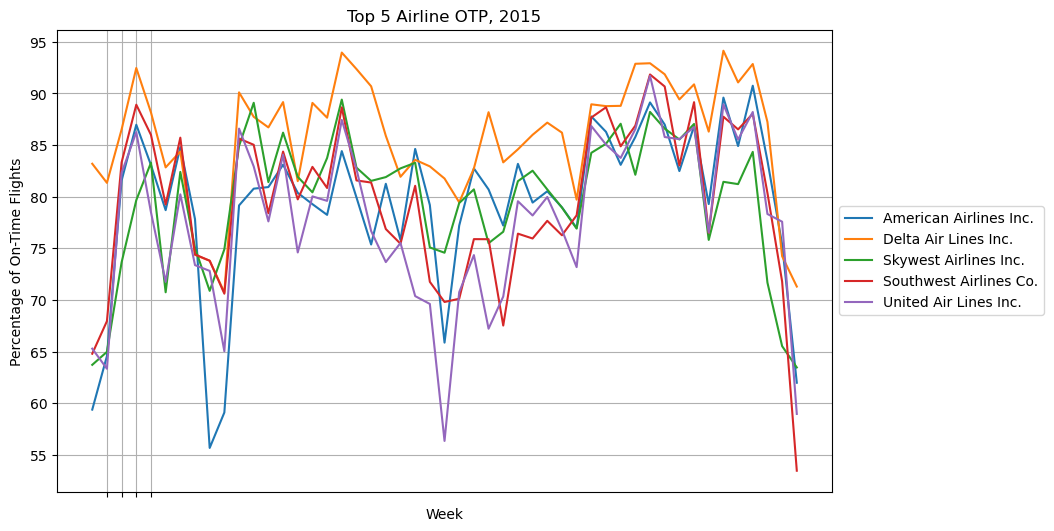

In [61]:
#calculate the percentage of on-time flights by month. (I assume on time to be no more than 15 minutes late)
on_time_performance = df.groupby(['al_fullname', 'week_number'])[['arrival_delay']].apply(lambda x: ((x <= 15).sum() / len(x)) * 100)
on_time_performance = on_time_performance.reset_index()

#subset the top 5 airlines
top_5 = df.groupby('al_fullname')['distance'].sum().sort_values(ascending = False).head(5)
top_5 = pd.DataFrame(top_5)

on_time_performance = on_time_performance[on_time_performance.al_fullname.isin(top_5.index)]

#reshape the data for plotting
pivot_table = on_time_performance.pivot(index='week_number', columns='al_fullname', values='arrival_delay')

#line plot of on-time performance by month
pivot_table.plot(kind='line', figsize=(10, 6))
plt.title('Top 5 Airline OTP, 2015')
plt.xlabel('Week')
plt.ylabel('Percentage of On-Time Flights')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(range(1, 5))
plt.grid(True)
plt.show()

In [62]:
# calculate average and standard deviation of arrival delay
df.groupby(['al_fullname'])['arrival_delay'].agg(['mean','std']).reset_index()

,al_fullname,mean,std
0,Alaska Airlines Inc.,-0.791409,29.018948
1,American Airlines Inc.,3.935214,45.015492
2,American Eagle Airlines Inc.,7.316540,44.535512
3,Atlantic Southeast Airlines,6.964550,41.189887
4,Delta Air Lines Inc.,0.680265,39.166200
5,Frontier Airlines Inc.,13.729468,52.976344
6,Hawaiian Airlines Inc.,2.161856,25.787022
7,JetBlue Airways,6.949339,42.039092
8,Skywest Airlines Inc.,6.221438,39.747253
9,Southwest Airlines Co.,4.837831,33.227323


 ### Which routes have the highest probability of being canceled?

In [63]:
df['cancelled'].value_counts(normalize=True) * 100

cancelled
0    98.360559
1     1.639441
Name: proportion, dtype: float64

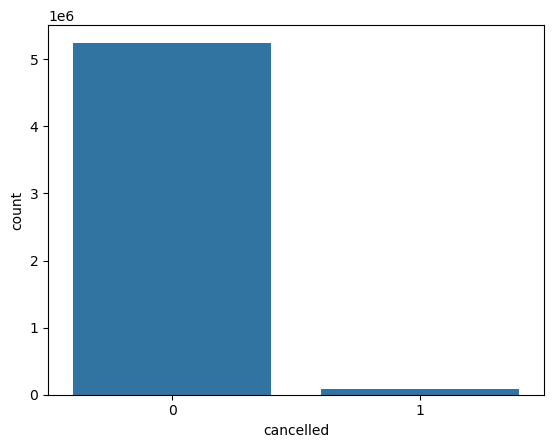

In [64]:
sns.countplot(x='cancelled', data = df)
plt.show()

### Cancellation rate by Airline

In [65]:
df.groupby(['al_fullname'])['cancelled'].mean().sort_values(ascending = False).reset_index()

,al_fullname,cancelled
0,American Eagle Airlines Inc.,0.054106
1,Atlantic Southeast Airlines,0.028036
2,US Airways Inc.,0.020466
3,Spirit Air Lines,0.018130
4,Skywest Airlines Inc.,0.018013
5,JetBlue Airways,0.016913
6,American Airlines Inc.,0.015715
7,United Air Lines Inc.,0.013718
8,Southwest Airlines Co.,0.013584
9,Virgin America,0.009054


In [66]:
# group origin-destination pairs as 'route'
df['route'] = df['origin_airport'] + '-' + df['destination_airport']

In [67]:
df.groupby(['route'])['cancelled'].count().sort_values(ascending = False).reset_index()

,route,cancelled
0,SFO-LAX,13744
1,LAX-SFO,13457
2,JFK-LAX,12016
3,LAX-JFK,12015
4,LAS-LAX,9715
...,...,...
4688,SBN-COS,1
4689,MCI-AUS,1
4690,BOI-EUG,1
4691,IAD-TTN,1


In [68]:
df.head()

,month,day,day_of_week,airline,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_time,...,date,week_number,dow_name,season,scheduled_departure_datetime,sched_hour,dist_type,late_arrival,late_departure,route
0,1,1,4,AS,ANC,SEA,00:05:00,23:54:00,-11.0,205.0,...,2015-01-01,00,Thursday,winter,2015-01-01 00:05:00,00,medium,0,0,ANC-SEA
1,1,1,4,AA,LAX,PBI,00:10:00,00:02:00,-8.0,280.0,...,2015-01-01,00,Thursday,winter,2015-01-01 00:10:00,00,long,0,0,LAX-PBI
2,1,1,4,US,SFO,CLT,00:20:00,00:18:00,-2.0,286.0,...,2015-01-01,00,Thursday,winter,2015-01-01 00:20:00,00,long,0,0,SFO-CLT
3,1,1,4,AA,LAX,MIA,00:20:00,00:15:00,-5.0,285.0,...,2015-01-01,00,Thursday,winter,2015-01-01 00:20:00,00,long,0,0,LAX-MIA
4,1,1,4,AS,SEA,ANC,00:25:00,00:24:00,-1.0,235.0,...,2015-01-01,00,Thursday,winter,2015-01-01 00:25:00,00,medium,0,0,SEA-ANC


Text(0, 0.5, 'Cancellation Count')

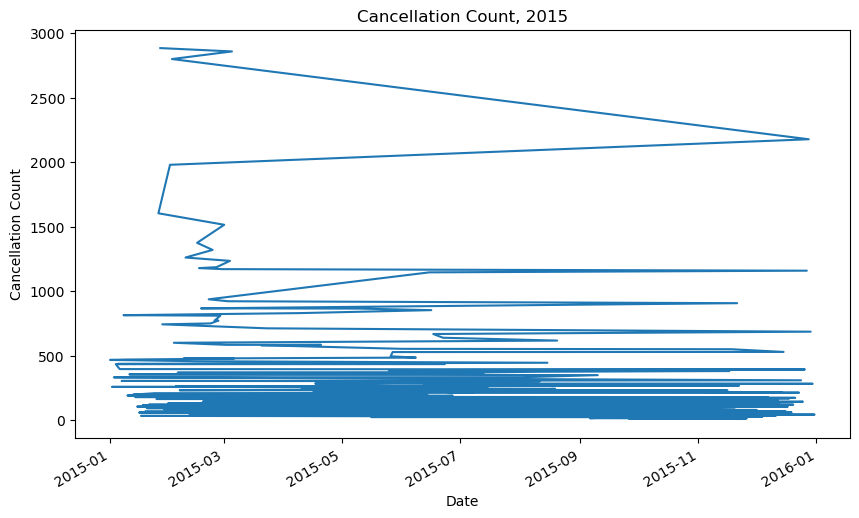

In [69]:
plt.figure(figsize=(10, 6))
df.groupby(['date'])['cancelled'].sum().sort_values(ascending = False).plot()
plt.title('Cancellation Count, 2015')
plt.xlabel('Date')
plt.ylabel('Cancellation Count')

In [70]:
df['month'].nunique()

11

In [71]:
df.groupby('month')['cancelled'].sum()

month
1     11982
2     20517
3     11002
4      4520
5      5694
6      9120
7      4806
8      5052
9      2075
11     4599
12     8063
Name: cancelled, dtype: int64

We have data of 2 months only which isnt enough to decipher the trends

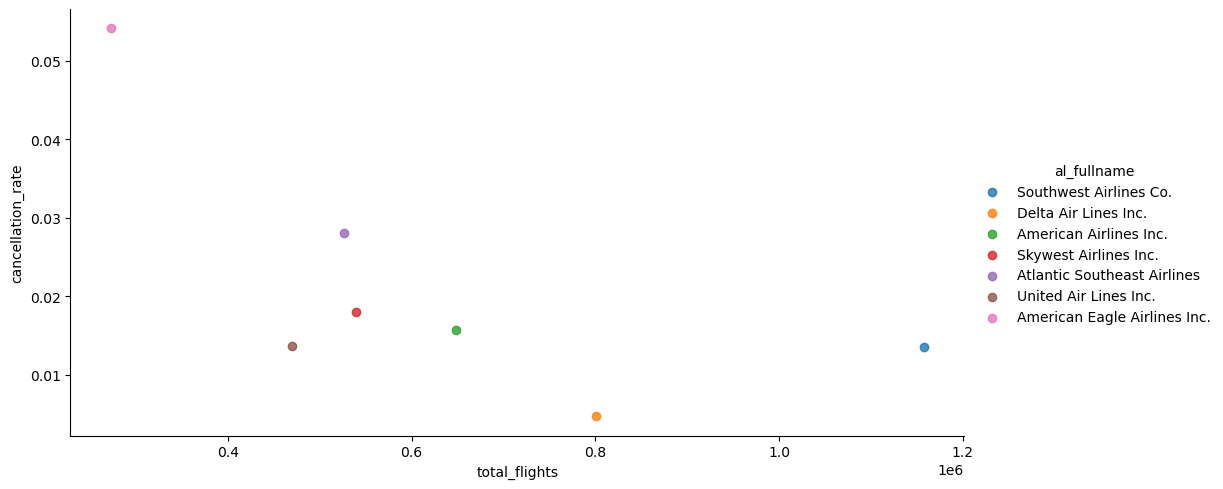

In [72]:
# Count number of cancellations and flights for each airline
df_cancelled = df.groupby('al_fullname')['cancelled'].agg(['sum','count']).rename(columns = {'sum':'total_cancelled', 'count':'total_flights'})
df_cancelled['cancellation_rate'] = df_cancelled['total_cancelled']/df_cancelled['total_flights']


sns.lmplot(data = df_cancelled.reset_index().nlargest(7, 'total_flights'),
           x = 'total_flights', y = 'cancellation_rate', hue = 'al_fullname',
           fit_reg = False, aspect = 2)

- There is no correaltion between total flights taken and cancellation rate
- Airline size doesn't necessarily correlate with lower cancellation rates

In [73]:
# get average cancellations by day of week
dow_canc = df.groupby(['dow_name'])['cancelled'].mean().reset_index().rename(columns={'cancelled': 'cancellation_mean'})
dow_canc['cancellation_mean'] = dow_canc['cancellation_mean']

# get count of flights by day of week
dow_count = df.groupby(['dow_name'])['cancelled'].count().reset_index().rename(columns={'cancelled': 'flight_count'})

# merge dataframes and print
canc_df = pd.merge(dow_canc, dow_count, on = 'dow_name')
canc_df.sort_values(by = 'flight_count')

,dow_name,cancellation_mean,flight_count
2,Saturday,0.013123,637814
3,Sunday,0.017252,754701
0,Friday,0.009851,779708
5,Tuesday,0.019165,780858
4,Thursday,0.015193,789594
6,Wednesday,0.013239,790991
1,Monday,0.026182,799248


Text(0, 0.5, 'Cancellation Count')

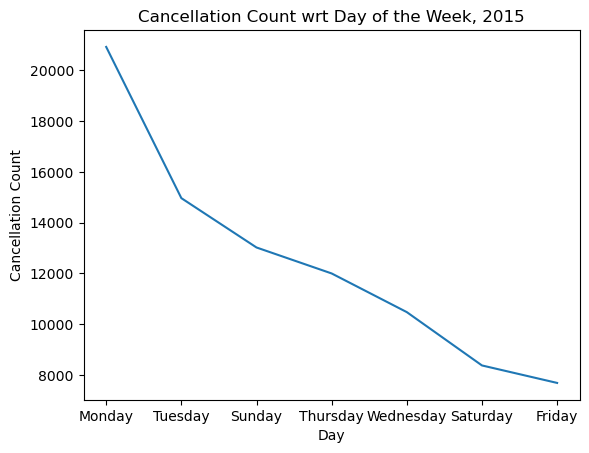

In [74]:
df.groupby(['dow_name'])['cancelled'].sum().sort_values(ascending = False).plot()
plt.title('Cancellation Count wrt Day of the Week, 2015')
plt.xlabel('Day')
plt.ylabel('Cancellation Count')

In [75]:
df.groupby(['origin_airport'])['cancelled'].count().sort_values(ascending = False).reset_index()

,origin_airport,cancelled
0,ATL,346836
1,ORD,285884
2,DFW,239551
3,DEN,196055
4,LAX,194673
...,...,...
317,STC,83
318,DLG,77
319,GST,77
320,AKN,63


In [76]:
df.groupby(['destination_airport'])['cancelled'].count().sort_values(ascending = False).reset_index()

,destination_airport,cancelled
0,ATL,346904
1,ORD,285906
2,DFW,239582
3,DEN,196010
4,LAX,194696
...,...,...
317,STC,82
318,DLG,77
319,GST,77
320,AKN,63


## **American airline flights Cancellation Prediction**

In [77]:
# subset df to include only american airline flights
al_df = df[(df['airline'] == 'AA')]

# removing columns where data isn't available(e.g. departure delay isn't known for cancelled flight)
relevant_cols = ['cancelled','month','day_of_week','distance','scheduled_time', 'route', 'sched_hour']
al_df = al_df[relevant_cols]

In [78]:
al_df.head()

,cancelled,month,day_of_week,distance,scheduled_time,route,sched_hour
1,0,1,4,2330,280.0,LAX-PBI,00
3,0,1,4,2342,285.0,LAX-MIA,00
8,0,1,4,1464,195.0,SFO-DFW,00
11,0,1,4,2174,268.0,LAS-MIA,00
21,0,1,4,2724,338.0,SEA-MIA,01


In [79]:
# Encode day of week, route, hour, month
day_en = pd.get_dummies(al_df['day_of_week'], prefix = 'day')
route_en = pd.get_dummies(al_df['route'], prefix = 'route')
month_en = pd.get_dummies(al_df['month'], prefix = 'month')
hour_en = pd.get_dummies(al_df['sched_hour'], prefix = 'hour')


#concat dummy vars to dataframe
al_df = pd.concat([al_df, day_en, month_en, hour_en, route_en], axis = 1)
al_df = al_df.drop(columns = ['month','day_of_week', 'route', 'sched_hour'])

In [80]:
al_df.head()

,cancelled,distance,scheduled_time,day_1,day_2,day_3,day_4,day_5,day_6,day_7,...,route_TPA-ORD,route_TPA-PHL,route_TPA-PHX,route_TUL-DFW,route_TUL-MIA,route_TUL-ORD,route_TUS-DFW,route_TUS-ORD,route_XNA-DFW,route_XNA-ORD
1,0,2330,280.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,2342,285.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,0,1464,195.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,0,2174,268.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21,0,2724,338.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
#split data into features + target
X= al_df.drop('cancelled', axis=1)
y = al_df.cancelled

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# split feature and target data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [83]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [84]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[191526      0]
 [  3083      0]]


In [85]:
print(classification_report(y_test, y_pred, target_names=["NOT CANCELLED", "CANCELLED"]))

               precision    recall  f1-score   support

NOT CANCELLED       0.98      1.00      0.99    191526
    CANCELLED       0.00      0.00      0.00      3083

     accuracy                           0.98    194609
    macro avg       0.49      0.50      0.50    194609
 weighted avg       0.97      0.98      0.98    194609

